In [1]:
from lda import lda
from lda.data.corpus import Corpus
from lda.data.document import Document
import matplotlib.pyplot as plt

In [2]:
corpus = Corpus(documents=[
    Document.from_text('Have a jolly christmas!'),
    Document.from_text('Merry christmas, Jens!'),
    Document.from_text('Jens Lagergen is the best professor at university.'),
    Document.from_text('Universities are important learning centers. Especially because of Jens Lagergen.'),
    Document.from_text('What even is a university? Experts disagree.')
])
corpus

Corpus with 5 documents

In [3]:
corpus.documents[0].included_words

[Word(original_form='jolly', lda_form='jolly', include=True),
 Word(original_form='christmas', lda_form='christmas', include=True)]

In [4]:
corpus.documents[1].included_words

[Word(original_form='Merry', lda_form='merry', include=True),
 Word(original_form='christmas', lda_form='christmas', include=True),
 Word(original_form='Jens', lda_form='jens', include=True)]

In [5]:
corpus.documents[2].included_words

[Word(original_form='Jens', lda_form='jens', include=True),
 Word(original_form='Lagergen', lda_form='lagergen', include=True),
 Word(original_form='best', lda_form='good', include=True),
 Word(original_form='professor', lda_form='professor', include=True),
 Word(original_form='university', lda_form='university', include=True)]

In [6]:
corpus.documents[3].included_words

[Word(original_form='Universities', lda_form='university', include=True),
 Word(original_form='important', lda_form='important', include=True),
 Word(original_form='learning', lda_form='learning', include=True),
 Word(original_form='centers', lda_form='center', include=True),
 Word(original_form='Especially', lda_form='especially', include=True),
 Word(original_form='Jens', lda_form='jens', include=True),
 Word(original_form='Lagergen', lda_form='lagergen', include=True)]

In [7]:
corpus.documents[2].included_words[-1] == corpus.documents[3].included_words[0]

True

In [8]:
corpus.word_count

Counter({Word(original_form='jolly', lda_form='jolly', include=True): 1,
         Word(original_form='christmas', lda_form='christmas', include=True): 2,
         Word(original_form='Merry', lda_form='merry', include=True): 1,
         Word(original_form='Jens', lda_form='jens', include=True): 3,
         Word(original_form='Lagergen', lda_form='lagergen', include=True): 2,
         Word(original_form='best', lda_form='good', include=True): 1,
         Word(original_form='professor', lda_form='professor', include=True): 1,
         Word(original_form='university', lda_form='university', include=True): 3,
         Word(original_form='important', lda_form='important', include=True): 1,
         Word(original_form='learning', lda_form='learning', include=True): 1,
         Word(original_form='centers', lda_form='center', include=True): 1,
         Word(original_form='Especially', lda_form='especially', include=True): 1,
         Word(original_form='Experts', lda_form='expert', include=Tru

In [9]:
params, lower_bound_evol = lda(corpus, num_topics=2, num_iterations=64)

  0%|          | 0/64 [00:00<?, ?it/s]

In [10]:
params

{'alpha': array([0.00797937, 0.01187346]),
 'beta': [{Word(original_form='university', lda_form='university', include=True): 0.125,
   Word(original_form='christmas', lda_form='christmas', include=True): 0.125,
   Word(original_form='disagree', lda_form='disagree', include=True): 0.0,
   Word(original_form='Jens', lda_form='jens', include=True): 0.25,
   Word(original_form='professor', lda_form='professor', include=True): 0.125,
   Word(original_form='Lagergen', lda_form='lagergen', include=True): 0.125,
   Word(original_form='learning', lda_form='learning', include=True): 0.0,
   Word(original_form='centers', lda_form='center', include=True): 0.0,
   Word(original_form='best', lda_form='good', include=True): 0.125,
   Word(original_form='jolly', lda_form='jolly', include=True): 0.0,
   Word(original_form='Experts', lda_form='expert', include=True): 0.0,
   Word(original_form='Especially', lda_form='especially', include=True): 0.0,
   Word(original_form='Merry', lda_form='merry', inclu

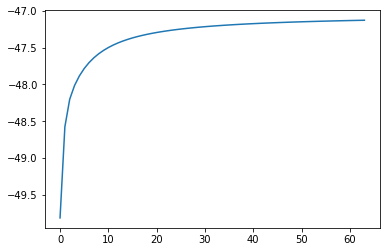

In [11]:
plt.figure()
plt.plot(lower_bound_evol)

In [12]:
lower_bound_evol

array([-49.81446182, -48.57609862, -48.20167702, -48.01515355,
       -47.88476802, -47.78435508, -47.70402278, -47.63838244,
       -47.58388856, -47.53803587, -47.49899559, -47.46540593,
       -47.43623626, -47.41069394, -47.38816148, -47.36815016,
       -47.35026941, -47.33420437, -47.31969819, -47.30653943,
       -47.29455262, -47.28359099, -47.27353096, -47.26426775,
       -47.25571197, -47.24778697, -47.24042663, -47.23357365,
       -47.22717814, -47.22119645, -47.21559028, -47.21032584,
       -47.20537323, -47.20070593, -47.1963003 , -47.1921352 ,
       -47.18819171, -47.18445281, -47.18090318, -47.17752896,
       -47.17431761, -47.17125775, -47.16833902, -47.16555197,
       -47.16288799, -47.16033919, -47.15789832, -47.15555873,
       -47.15331432, -47.15115945, -47.1490889 , -47.14709788,
       -47.14518192, -47.14333689, -47.14155897, -47.13984458,
       -47.13819041, -47.13659337, -47.13505057, -47.13355932,
       -47.13211709, -47.13072152, -47.12937041, -47.12